In [29]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import math
from time import time 
from scipy.stats import entropy
import glob
from scipy.stats import median_abs_deviation

In [256]:
archivos=glob.glob("7_10000/*.txt")


In [292]:
Tiempos=[]
Intensidad=[]
Error=[]
n=10000
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    Error.append(Datos[:,2])
    i=i+1

In [258]:
import numpy as np

def entropy1(probabilities):
    """
    Calculate entropy given a list of probabilities.
    """
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_probabilities(data):
    """
    Calculate probabilities of each unique value in the data.
    """
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    return probabilities


In [259]:
MAD=[]
Mediana,promedio, sigma,amplitud=[],[],[],[]
Entropy=[]
Entropy2=[]
skewness=[]
for i in Intensidad:
    MAD.append(median_abs_deviation(i))
    Mediana.append(np.median(i))
    promedio.append(np.mean(i))
    sigma.append(np.std(i))
    amplitud.append(max(i)-min(i))
    skewness.append(skew(i))
    proba=calculate_probabilities(i)
    Entropy.append(entropy1(proba))
    Entropy2.append(entropy(i,base=len(i)))
    
Mediana=np.array(Mediana)
promedio=np.array(promedio)
amplitud=np.array(amplitud)
skewness=np.array(skewness)
Entropy=np.array(Entropy)
sigma=np.array(sigma)
Entropy2=np.array(Entropy2)

665


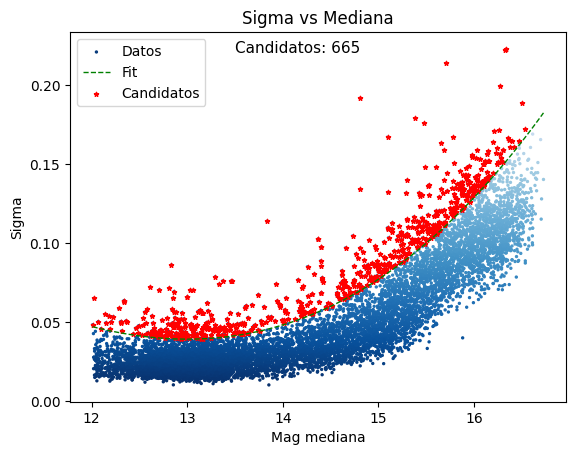

In [263]:
plt.scatter(Mediana,sigma,s=2,c=sigma,cmap="Blues_r",label="Datos")
plt.xlabel("Mag mediana")
plt.ylabel("sigma")
coefs=np.polyfit(Mediana,sigma,3)
polynomial = np.poly1d(coefs)

y_pred = polynomial(Mediana)*1.2+0.01

x_fit = np.linspace(min(Mediana), max(Mediana), 100)
plt.plot(x_fit, polynomial(x_fit)*1.2+0.01, color='green', linestyle='--', linewidth=1, label='Fit')

above_curve_sigma = sigma > y_pred

plt.scatter(Mediana[above_curve_sigma], sigma[above_curve_sigma], color='r', s=10, label='Candidatos', marker='*')
print(sigma[above_curve_sigma].shape[0])

# Etiqueta del número de candidatos
num_candidates = sigma[above_curve_sigma].shape[0]
plt.text(13.5, 0.22, f'Candidatos: {num_candidates}', fontsize=11)

# Decoraciones
plt.xlabel("Mag mediana")
plt.ylabel("Sigma")
plt.title("Sigma vs Mediana")

plt.legend()


plt.savefig("sigmamediana3.png")
plt.show()

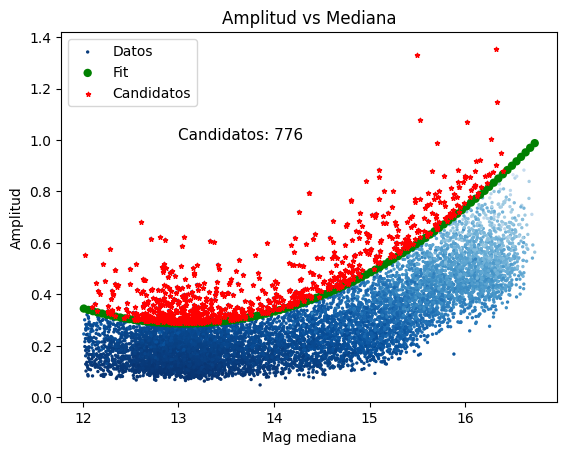

In [264]:

plt.scatter(Mediana,amplitud,s=2,c=sigma,cmap="Blues_r",label="Datos")
coefs=np.polyfit(Mediana,amplitud,3)
polynomial = np.poly1d(coefs)

y_pred = polynomial(Mediana) * 1.5
plt.scatter(x_fit,polynomial(x_fit)*1.5, color='green', linestyle='--', label='Fit',linewidths=0.01)

above_curve_amplitud = amplitud > y_pred

plt.scatter(Mediana[above_curve_amplitud], amplitud[above_curve_amplitud], color='r', s=10, label='Candidatos', marker='*')
num_candidates = amplitud[above_curve_amplitud].shape[0]

plt.text(13, 1, f'Candidatos: {num_candidates}', fontsize=11)

# Decoraciones
plt.xlabel("Mag mediana")
plt.ylabel("Amplitud")
plt.title("Amplitud vs Mediana")

plt.legend()


plt.savefig("amplitudmediana3.png")
plt.show()

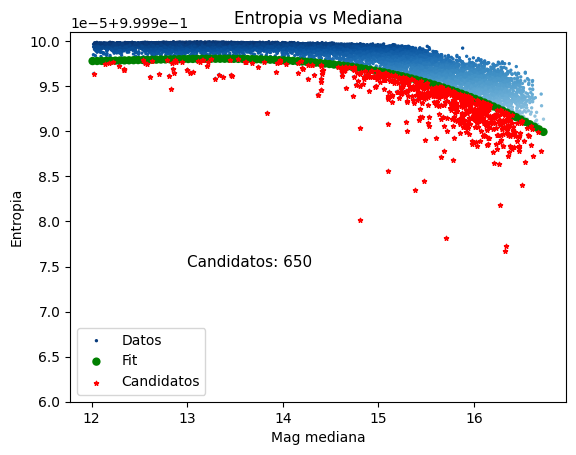

In [265]:
#plt.scatter(Mediana,Entropy)
plt.scatter(Mediana,Entropy2,s=2,c=sigma,cmap="Blues_r",label="Datos")

plt.ylim(0.99996,1.000001)

coefs=np.polyfit(Mediana,Entropy2,3)
polynomial = np.poly1d(coefs)-0.0000015

y_pred = polynomial(Mediana)
plt.scatter(x_fit,polynomial(x_fit), color='green', linestyle='--', label='Fit',linewidths=0.01)


above_curve_entropia = Entropy2 < y_pred

plt.scatter(Mediana[above_curve_entropia], Entropy2[above_curve_entropia], color='r', s=10, label='Candidatos', marker='*')
num_candidates = amplitud[above_curve_entropia].shape[0]

plt.text(13, 0.999975, f'Candidatos: {num_candidates}', fontsize=11)

# Decoraciones
plt.xlabel("Mag mediana")
plt.ylabel("Entropia")
plt.title("Entropia vs Mediana")

plt.legend()


plt.savefig("entropiamediana3.png")
plt.show()

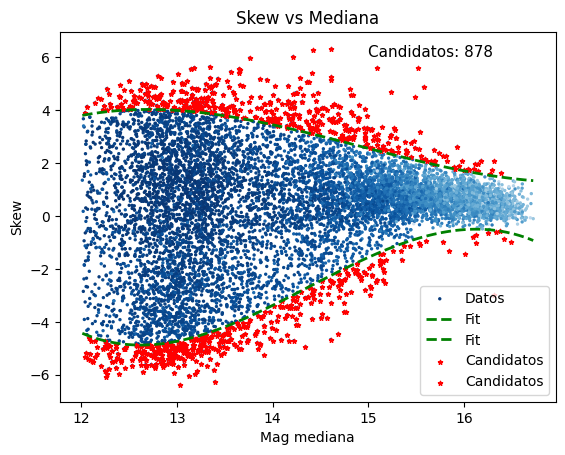

In [262]:
plt.scatter(Mediana, skewness,s=2,c=sigma,cmap="Blues_r",label="Datos")


id_mayor=np.where(skewness>0)
m1=Mediana[id_mayor]
s1=skewness[id_mayor]

coefs=np.polyfit(m1,s1,3)
polynomial = np.poly1d(coefs)
y_pred = polynomial(Mediana)*1.5+0.7
plt.plot(x_fit, polynomial(x_fit)*1.5+.7, color='green', linestyle='--', linewidth=2, label='Fit')


above_skew1 = skewness > y_pred
#Segunda
id_menor=np.where(skewness<0)
m2=Mediana[id_menor]
s2=skewness[id_menor]
coefs=np.polyfit(m2,s2,3)
polynomial = np.poly1d(coefs)*1.7-0.2


y_pred = polynomial(Mediana)
plt.plot(x_fit, polynomial(x_fit), color='green', linestyle='--', linewidth=2, label='Fit')



above_skew2 = skewness < y_pred
plt.scatter(Mediana[above_skew1], skewness[above_skew1], color='r', s=10, label='Candidatos', marker='*')
plt.scatter(Mediana[above_skew2], skewness[above_skew2], color='r', s=10, label='Candidatos', marker='*')

num_candidates = amplitud[above_skew2].shape[0]+amplitud[above_skew1].shape[0]

plt.text(15, 6, f'Candidatos: {num_candidates}', fontsize=11)

# Decoraciones
plt.xlabel("Mag mediana")
plt.ylabel("Skew")
plt.title("Skew vs Mediana")
plt.legend()


plt.savefig("skewmediana3.png")
plt.show()

In [369]:
cand=0
id_candidatos=[]
for ia,a in enumerate (above_curve_sigma):
    m=0
    if(above_curve_sigma[ia]):
        m=m+1
    if(above_curve_entropia[ia]):
        m=m+1
    if(above_curve_amplitud[ia]):
        m=m+1
    if(above_skew1[ia]):
        m=m+1
    if(above_skew2[ia]):
        m=m+1
    if(m>=2):
        cand=cand+1
        id_candidatos.append(ia)
print(cand)

755


In [364]:
above_curve_amplitud=np.array(above_curve_amplitud)
above_curve_entropia=np.array(above_curve_entropia)
above_curve_sigma=np.array(above_curve_sigma)
above_skew1=np.array(above_skew1)
above_skew2=np.array(above_skew2)
indice_candidatos1=np.logical_or(above_curve_amplitud,above_curve_entropia)
indice_candidatos2=np.logical_or(indice_candidatos1,above_curve_sigma)
indice_candidatos3=np.logical_or(indice_candidatos2,above_skew1)
indice_candidatos4=np.logical_or(indice_candidatos3,above_skew2)

indice_candidatos4=np.array(indice_candidatos4)

indice_candidatos4[:]

array([False, False, False, ..., False, False, False])

In [266]:
np.shape(amplitud[indice_candidatos4])

(1881,)

In [370]:
sigmacandidatas=sigma[id_candidatos]
medianacandidatas=Mediana[id_candidatos]
amplitudcandidatas=amplitud[id_candidatos]

431

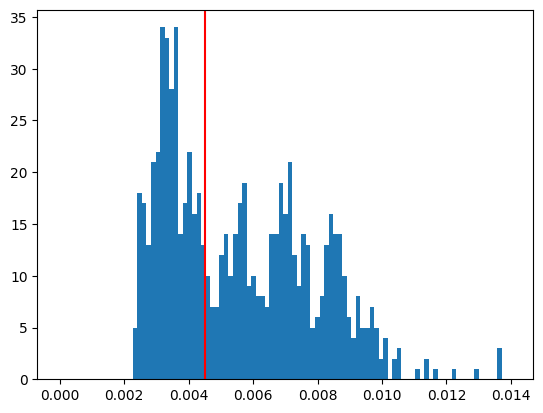

In [371]:
plt.hist(sigmacandidatas/medianacandidatas,bins=np.linspace(0,0.014,100));
plt.axvline(0.0045,c="r")

x_i=np.where(sigmacandidatas/medianacandidatas>0.0045)
len(x_i[0])

431

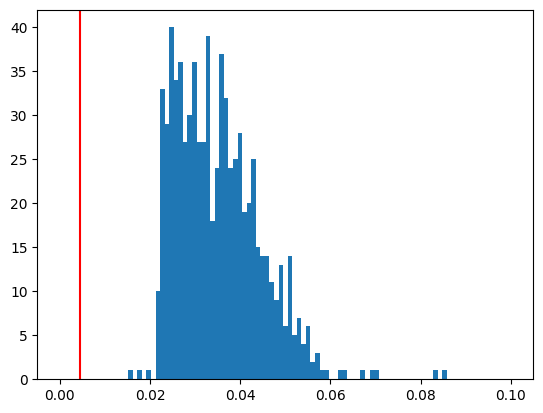

In [373]:
plt.hist(amplitudcandidatas/medianacandidatas,bins=np.linspace(0,0.1,100));
plt.axvline(0.0045,c="r")

x_i=np.where(sigmacandidatas/medianacandidatas>0.0045)
len(x_i[0])

In [374]:

np.shape(amplitud[indice_candidatos4])

(1869,)

In [380]:
x_ind=np.where(id_candidatos)
x_ind=np.array(x_ind)
Tiempos_candidatas=[]
Magnitud_candidatas=[]
Error_candidatas=[]
for i_t,t in enumerate(Tiempos):
    if(i_t in x_ind):
        Tiempos_candidatas.append(t)
        Magnitud_candidatas.append(Intensidad[i_t])
        Error_candidatas.append(Error[i_t])

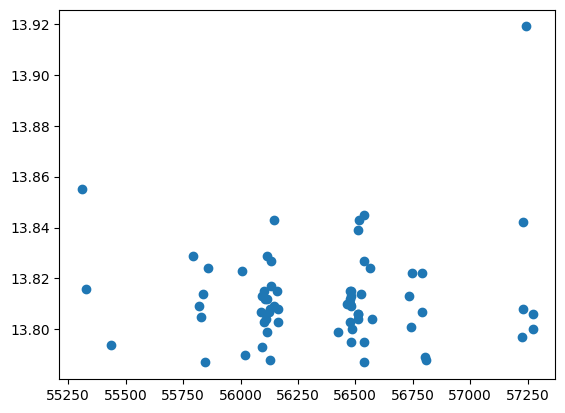

In [381]:
plt.scatter(Tiempos_candidatas[0],Magnitud_candidatas[0])

In [382]:
from astropy.timeseries import LombScargle
import random


435
19.38989394227321


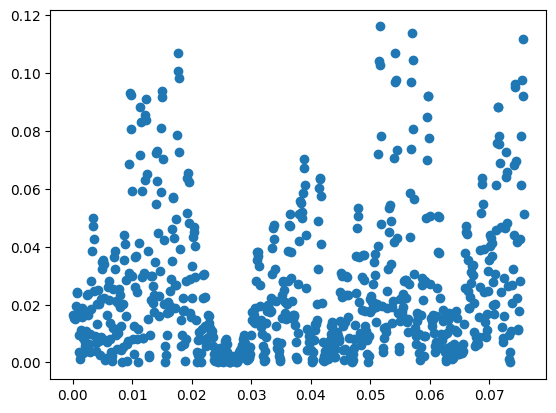

In [383]:
numero_aleatorio = random.randint(1, len(Tiempos_candidatas))
print(numero_aleatorio)
frequency, power = LombScargle(Tiempos_candidatas[numero_aleatorio], Magnitud_candidatas[numero_aleatorio], Error_candidatas[numero_aleatorio]).autopower()
plt.scatter(frequency,power)
print(1/frequency[np.argmax(power)])

x,y=Fases(Magnitud_candidatas[3],best_period,Tiempos_candidatas[3]);


<Figure size 1500x1500 with 0 Axes>

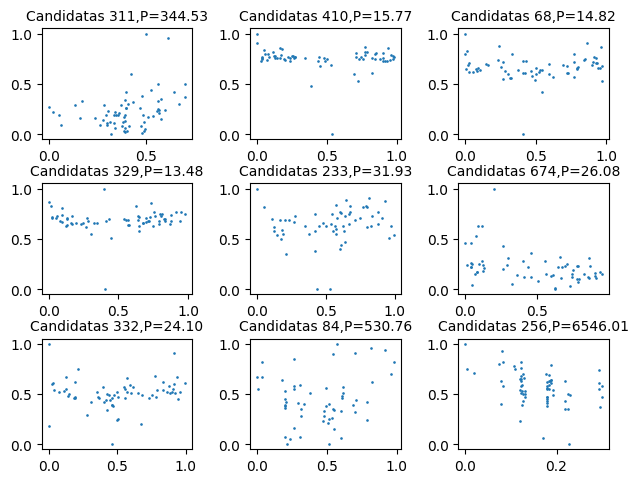

In [395]:
plt.figure(figsize=(15,15))
fig, axs = plt.subplots(3, 3)

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Iterar sobre todas las subtramas y colocar un gráfico en cada una
for i in range(3):
    for j in range(3):
        numero_aleatorio = random.randint(1, len(Tiempos_candidatas))
        frequency, power = LombScargle(Tiempos_candidatas[numero_aleatorio], Magnitud_candidatas[numero_aleatorio], Error_candidatas[numero_aleatorio]).autopower()
        x,y=Fases(Magnitud_candidatas[numero_aleatorio],1/frequency[np.argmax(power)],Tiempos_candidatas[numero_aleatorio]);
        # Colocar el gráfico en la subtrama correspondiente
        axs[i, j].scatter(x, y,s=0.8)
        axs[i, j].set_title(f'Candidatas {numero_aleatorio},P={1/frequency[np.argmax(power)]:.2f}',fontsize=10)

# Mostrar el gráfico
plt.show()